# Load

In [64]:
import pandas as pd
import numpy as np
import os
from shutil import copyfile
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import math
warnings.simplefilter('ignore', np.RankWarning)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100

In [ ]:
df = pd.read_csv("winequality-white.csv", header=0, sep=";")

In [83]:
df1 = pd.read_csv("winequality-red.csv", header=0, sep=";")
df1.to_csv("red_wine.csv", index=False)

In [66]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df.to_csv("white_wine.csv", index=False)

In [67]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [84]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
mylist = []

for chunk in  pd.read_table('YearPredictionMSD.txt', header=-1, sep=',', chunksize=20000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [ ]:
big_data.columns = big_data.columns.astype(str)

In [ ]:
hi = pd.read_table('YearPredictionMSD.txt', header=-1, sep=',', nrows=100000)

In [ ]:
hi.columns = hi.columns.astype(str)

In [ ]:
hi=hi.rename(columns={'0':'y'})

In [ ]:
hi.to_csv("songs.csv", index=False)

In [ ]:
df=hi.copy()

In [18]:
from sklearn.cross_validation import train_test_split

y = df.pop('quality')
X = df

# X_train,X_test = X[0:80000], X[80001:100000]
# y_train,y_test = y[0:80000], y[80001:100000]

X_train,X_test = X[0:4000], X[4001:]
y_train,y_test = y[0:4000], y[4001:]

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3,max_depth=1, random_state=0, loss='ls', verbose=1)
est.fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))    

      Iter       Train Loss   Remaining Time 
         1           0.7539            0.10s
         2           0.7160            0.15s
         3           0.6906            0.13s
         4           0.6741            0.12s
         5           0.6581            0.13s
         6           0.6474            0.13s
         7           0.6368            0.12s
         8           0.6283            0.13s
         9           0.6203            0.12s
        10           0.6141            0.12s
        20           0.5698            0.09s
        30           0.5492            0.08s
        40           0.5358            0.07s
        50           0.5265            0.05s
        60           0.5195            0.04s
        70           0.5140            0.03s
        80           0.5094            0.02s
        90           0.5055            0.01s
       100           0.5024            0.00s


0.43170912740835649

In [50]:
np.sqrt(mean_squared_error(y_test, est.predict(X_test))    )

0.65704575746926219

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, est.predict(X_test))

0.52960148871245571

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
parameters = {'n_estimators':(100, 150), 'learning_rate':(0.001, 0.01, 0.1, 0.3, 1), 'max_depth':[1,3,5,10], 'loss':['lad','ls']}


In [54]:
gs = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parameters, fit_params=None, n_jobs=-1, iid=True, refit=True, cv=None, verbose=1, return_train_score=True)

In [55]:
gs.fit(X, y)
results = gs.cv_results_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.6min finished


In [56]:
# View the accuracy score
print('Best score for data1:', gs.best_score_) 
# View the best parameters for the model found using grid search
print('Best Params:',gs.best_estimator_) 


('Best score for data1:', 0.28402771702675816)
('Best Params:', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))


In [58]:
est = gs.best_estimator_
est.fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))  

0.42543955023372143

In [60]:
np.sqrt(mean_squared_error(y_test, est.predict(X_test)))

0.65225727304011061

In [61]:
mean_absolute_error(y_test, est.predict(X_test))

0.52483153619698286

In [68]:
kendall = df.dropna().corr(method='kendall').abs()
spearman = df.dropna().corr(method='spearman').abs()
pearson = df.dropna().corr(method='pearson').abs()

In [69]:
def heatmap(corrDT):
    #create heatmap
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(corrDT, cmap=plt.cm.autumn, alpha=0.8)

    ##################################################
    ## FORMAT ##
    ##################################################

    fig = plt.gcf()
    fig.set_size_inches(8,11)

    # turn off the frame
    ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(corrDT.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(corrDT.shape[1])+0.5, minor=False)
    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels(corrDT.columns, minor=False) 
    ax.set_yticklabels(corrDT.index, minor=False)
    # rotate the 
    plt.xticks(rotation=270)

    ax.grid(False)

    # Turn off all the ticks
    ax = plt.gca()

    for t in ax.xaxis.get_major_ticks(): 
        t.tick1On = False 
        t.tick2On = False 
    for t in ax.yaxis.get_major_ticks(): 
        t.tick1On = False 
        t.tick2On = False  
        
pearson_styled = pearson.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
spearman_styled = spearman.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
kendall_styled = kendall.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

None
None
None


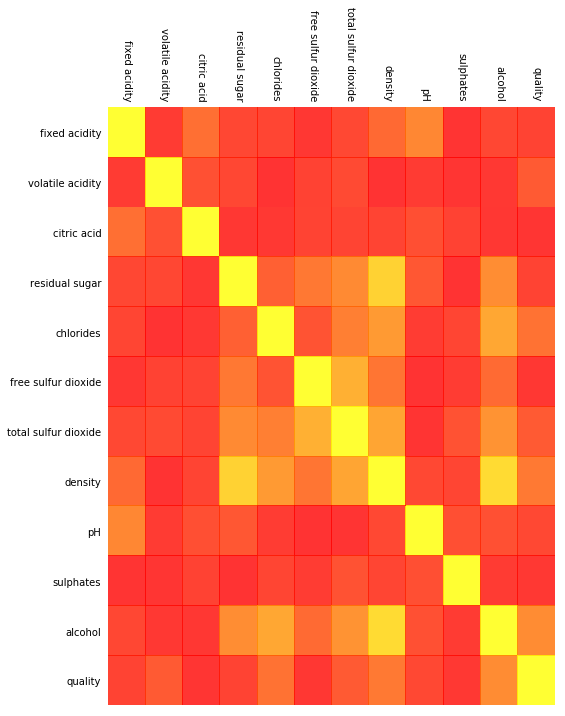

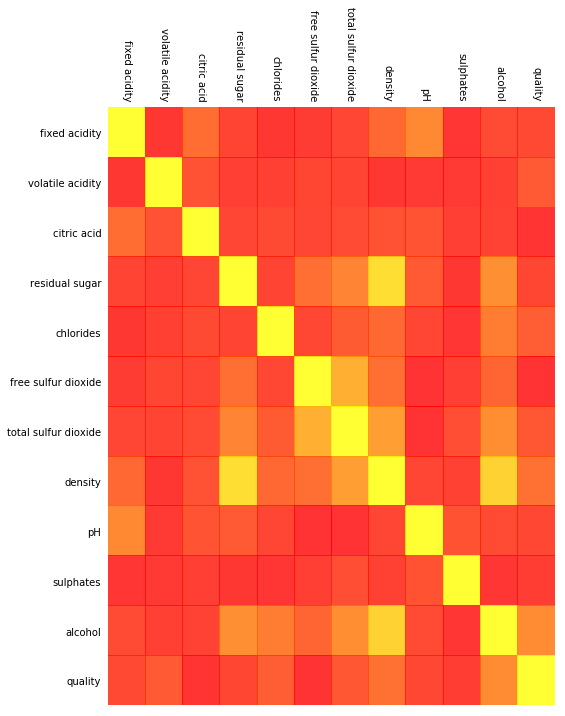

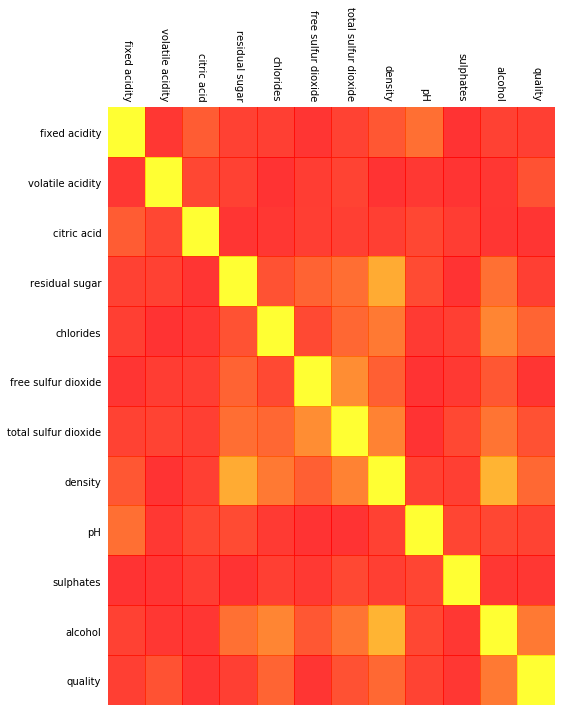

In [70]:
print heatmap(spearman)
print heatmap(pearson)
print heatmap(kendall)

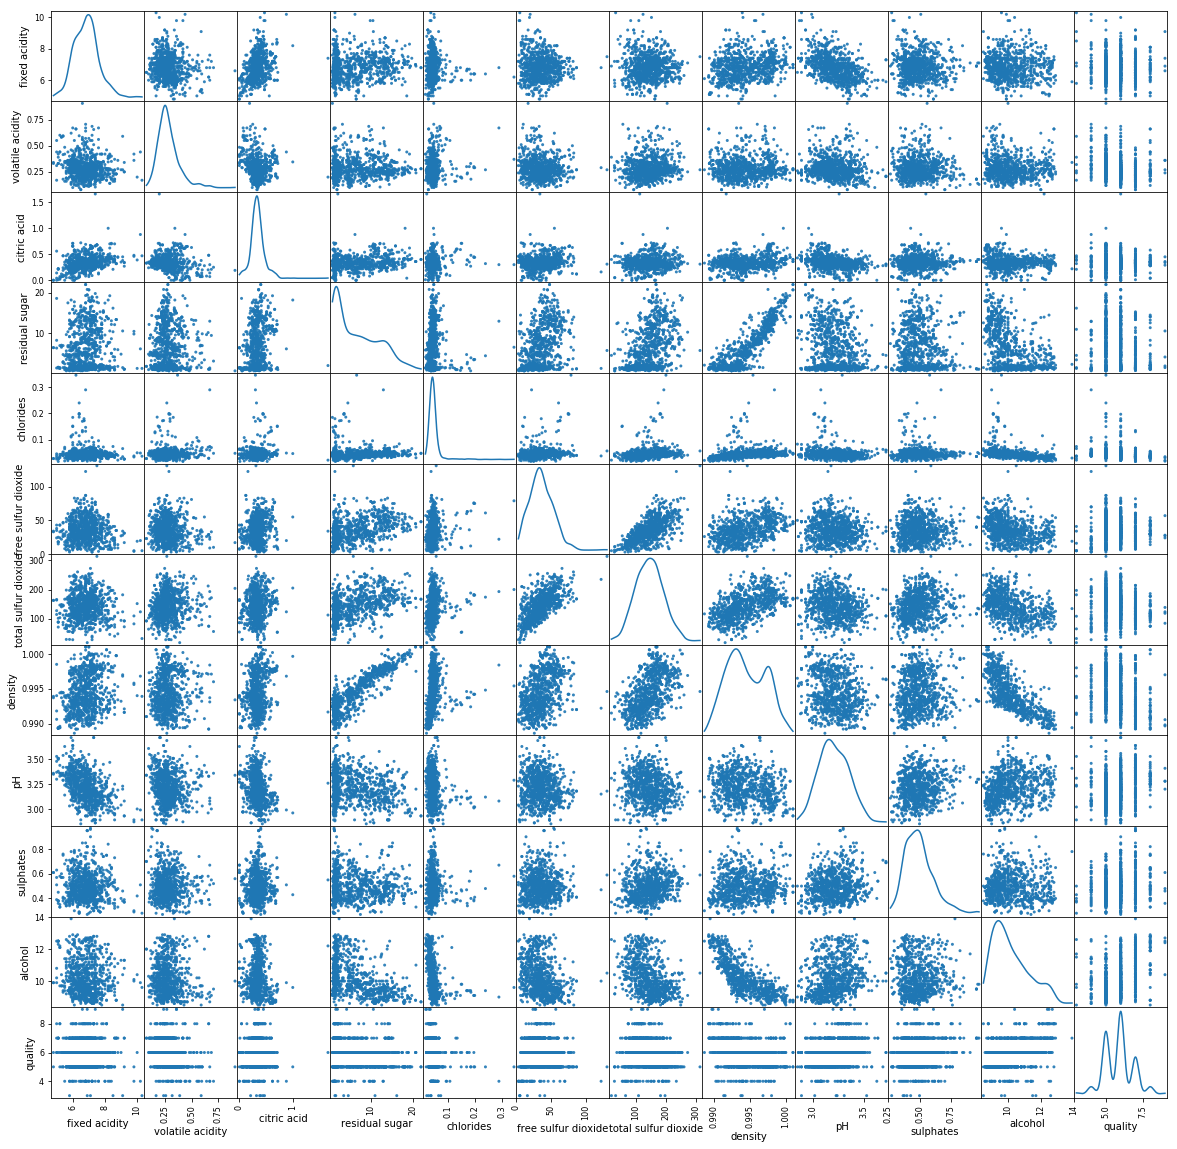

In [71]:
#create Sccatered matrix 
pd.plotting.scatter_matrix(df.head(n=1000), alpha = 0.9, figsize = (20,20), diagonal = 'kde');


input variables (based on physicochemical tests): 
1 - fixed acidity
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 
Output variable (based on sensory data): 
12 - quality (score between 0 and 10)

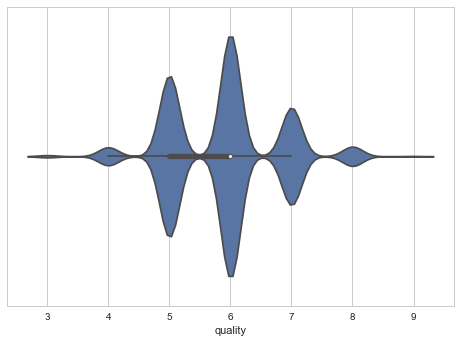

In [76]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.violinplot(x=df["quality"])

Deliverable 1. A description of the dataset and how you formalized the regression problem. The
description should include a list of features (possibly feature categories), number of examples,
number of categorical vs numerical features, number of features with missing values, etc...

1. The data set are related to red and white variants of the Portuguese "Vinho Verde" wine. 
2. We have 11 input variables and 1 out put target variable.\
3. The features are based on physicochemical tests.
4. Number of examples is 4898.
5. All features are numerical.
6. No missing values :)

In [ ]:
# Path's
DATA_PATH = os.path.join('data', 'train.csv')
COPY_PATH = os.path.join('data', 'train_Copy.csv')

In [ ]:
# Load the data
df_all = pd.read_csv(DATA_PATH)
# save a copy of the data
copyfile(DATA_PATH, COPY_PATH)

In [ ]:
df_all.head()

In [ ]:
df_all=df_all.rename(index=str, columns={df_all.columns[-1]: "y"})


In [ ]:
df_all.columns[-1]

# Drop Id and nan SalePrice rows

In [ ]:
df_all.drop(['Id'], axis=1, inplace=True)

In [ ]:
df_all = df_all[np.isfinite(df_all['SalePrice'])]

# Split

2. implement a function that splits the data into training and test, the split should be 80%
to the Train set and 20% to the Test set.

In [ ]:
# if can use sklearn split
X_train, X_test, y_train, y_test = train_test_split(df_all.drop('SalePrice', axis=1), df_all.SalePrice, test_size=0.2, random_state=42)

In [ ]:
def split_data(df, train_perc = 0.8):

    df['train'] = np.random.rand(len(df)) < train_perc

    train = df[df.train == 1]
    train.drop(['train'], axis=1, inplace=True)
    test = df[df.train == 0]
    test.drop(['train'], axis=1, inplace=True)

    

    split_data ={'train': train, 'test': test}

    return split_data

In [ ]:
split_data = split_data(df_all)

In [ ]:
split_data['train'].head()

In [ ]:
# no need when doing functions
df_all=split_data['train']

# Categorical data

In [ ]:
obj_cols = df_all.select_dtypes(include=['object']).columns

In [ ]:
coding_map = {}
for col in obj_cols:
    print col
    unique_vals = df_all[col].unique()
#     print unique_vals
    unique_vals_dict = {}
    for val in unique_vals:
        if pd.isnull(val):
            nan_mean = df_all[df_all[col].isnull()].SalePrice.mean()
            unique_vals_dict[val] = nan_mean
        else:
            val_mean = df_all[df_all[col] == val].SalePrice.mean()
        
        unique_vals_dict[val] = val_mean
          
    
#     print unique_vals_dict
        
        
    unique_vals_ranks_dict = {key: rank for rank, key in
                    enumerate(sorted(unique_vals_dict,
                    key=unique_vals_dict.get, reverse=True), 1)}
        
    print unique_vals_ranks_dict
    
    df_all[col].replace(unique_vals_ranks_dict, inplace=True)
    coding_map[col]=unique_vals_ranks_dict

# Numerical Data

In [ ]:
imputation_map = df_all.mean()

In [ ]:
df_all=df_all.fillna(imputation_map, inplace=True)

In [ ]:
imputation_map

# Apply filled values on test set

In [ ]:
for col in obj_cols:
    X_test[col].replace(coding_map[col], inplace=True)

In [ ]:
X_test=X_test.fillna(imputation_map, inplace=True)

# Continue split data to X and y

In [ ]:
# no need when doing functions
split_data['train']=df_all

In [ ]:
X_train, y_train = split_data['train'].drop('SalePrice', axis=1), split_data['train'].SalePrice
X_test, y_test = split_data['test'].drop('SalePrice', axis=1), split_data['test'].SalePrice

In [ ]:
X_test.info()

In [ ]:
import re
str_value = re.compile('.*')

In [ ]:
X_test.Neighborhood=X_test.Neighborhood.replace(to_replace=str_value, value=5)

In [ ]:
X_test.Neighborhood

In [ ]:
str_value = re.compile('.*?')
self.dataframe[col] = self.dataframe[col].replace(to_replace=str_value, value=None)
            